# Import packages

In [1]:
from pathlib import Path

from fastai.vision.all import *
from src.models import CloudNet

# Define DataLoader

In [2]:
processed_dir = Path('../data/processed')
valid_percent = 0.1
batch_transforms = aug_transforms()
num_workers = 0

train_loader = ImageDataLoaders.from_folder(
    processed_dir,
    train='train',
    valid_pct=valid_percent,
    batch_tfms=batch_transforms,
    num_workers=num_workers
).cuda()

# CloudNet
## Define Learner

In [3]:
model = CloudNet(num_classes=11)
optimizer = ranger
loss_func = CrossEntropyLossFlat()
metrics = [
    accuracy,
    Precision(average='macro'),
    Recall(average='macro'),
    FBeta(1, average='macro')
]
callbacks = [
    ShowGraphCallback(),
    SaveModelCallback(
        monitor='valid_loss', comp=None,
        min_delta=0.0, fname='CloudNet', 
        every_epoch=False, with_opt=False, reset_on_fit=True
    ) 
]
to_fp16 = True

learner = Learner(
    train_loader, model, loss_func=loss_func,
    opt_func=optimizer, metrics=metrics, cbs=callbacks,
    path='..'
)
if to_fp16:
    learner.to_fp16(
        loss_scale=512, flat_master=False,
        dynamic=True, max_loss_scale=16777216.0,
        div_factor=2.0, scale_wait=500, clip=None
    )

### Print training loop

In [4]:
learner.show_training_loop()

Start Fit
   - before_fit     : [ModelToHalf, TrainEvalCallback, Recorder, ProgressCallback, ShowGraphCallback, SaveModelCallback, MixedPrecision]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : [MixedPrecision]
         - after_pred     : [MixedPrecision]
         - after_loss     : []
         - before_backward: [MixedPrecision]
         - after_backward : [MixedPrecision]
         - after_step     : [MixedPrecision]
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback, ShowGraphCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
 

## Training model

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,fbeta_score,time
0,2.359494,2.366549,0.153543,0.047052,0.136110,0.065597,00:28
1,2.231112,2.246783,0.195538,0.253722,0.175256,0.122753,00:26
2,2.128744,2.128108,0.258530,0.223498,0.244516,0.193099,00:26
3,2.047949,2.047891,0.299213,0.278159,0.286627,0.248525,00:27
4,1.971207,1.993115,0.320210,0.307882,0.307277,0.280939,00:26
5,1.929266,1.950473,0.305774,0.331299,0.289000,0.278163,00:26
6,1.889758,1.907282,0.337270,0.326264,0.321527,0.297681,00:26
7,1.844514,1.859302,0.350394,0.312233,0.343863,0.314398,00:26
8,1.807784,1.831149,0.364829,0.328329,0.347562,0.311664,00:26
9,1.781330,1.853258,0.343832,0.319447,0.324796,0.284252,00:26


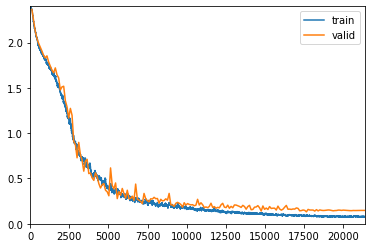

Better model found at epoch 0 with valid_loss value: 2.366549015045166.
Better model found at epoch 1 with valid_loss value: 2.2467827796936035.
Better model found at epoch 2 with valid_loss value: 2.1281075477600098.
Better model found at epoch 3 with valid_loss value: 2.047891139984131.
Better model found at epoch 4 with valid_loss value: 1.9931145906448364.
Better model found at epoch 5 with valid_loss value: 1.9504730701446533.
Better model found at epoch 6 with valid_loss value: 1.907281517982483.
Better model found at epoch 7 with valid_loss value: 1.8593021631240845.
Better model found at epoch 8 with valid_loss value: 1.8311487436294556.
Better model found at epoch 10 with valid_loss value: 1.7867796421051025.
Better model found at epoch 11 with valid_loss value: 1.7408288717269897.
Better model found at epoch 12 with valid_loss value: 1.695656418800354.
Better model found at epoch 13 with valid_loss value: 1.6669131517410278.
Better model found at epoch 15 with valid_loss valu

In [5]:
num_epochs = 200
learner.fit_one_cycle(num_epochs)

# ResNet18
## Define Learner

In [12]:
model = models.resnet18(num_classes=11, pretrained=False)
optimizer = ranger
loss_func = CrossEntropyLossFlat()
metrics = [
    accuracy,
    Precision(average='macro'),
    Recall(average='macro'),
    FBeta(1, average='macro')
]
callbacks = [
    ShowGraphCallback(),
    SaveModelCallback(
        monitor='valid_loss', comp=None,
        min_delta=0.0, fname='ResNet18', 
        every_epoch=False, with_opt=False, reset_on_fit=True
    ) 
]
to_fp16 = True

learner = Learner(
    train_loader, model, loss_func=loss_func,
    opt_func=optimizer, metrics=metrics, cbs=callbacks,
    path='..'
)
if to_fp16:
    learner.to_fp16(
        loss_scale=512, flat_master=False,
        dynamic=True, max_loss_scale=16777216.0,
        div_factor=2.0, scale_wait=500, clip=None
    )

## Training model

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,fbeta_score,time
0,2.211961,2.125545,0.227034,0.185582,0.214159,0.161517,00:39
1,1.974292,1.958862,0.308399,0.356603,0.291264,0.250471,00:37
2,1.826453,1.850149,0.346457,0.314884,0.328107,0.293960,00:37
3,1.726745,1.838050,0.367454,0.377696,0.348820,0.315107,00:37
4,1.656273,1.707814,0.409449,0.411027,0.397009,0.374855,00:38
5,1.583449,1.642257,0.425197,0.426608,0.418032,0.399501,00:38
6,1.530881,1.636957,0.431759,0.451595,0.419194,0.401186,00:38
7,1.484647,1.546198,0.464567,0.474380,0.449669,0.436112,00:38
8,1.424545,1.583917,0.461942,0.472547,0.451521,0.444870,00:38
9,1.398585,1.618505,0.463255,0.447961,0.457621,0.438565,00:38


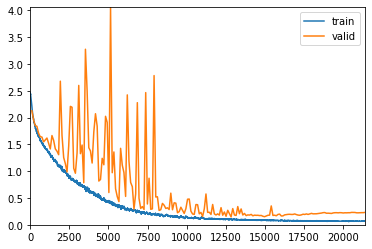

Better model found at epoch 0 with valid_loss value: 2.1255452632904053.
Better model found at epoch 1 with valid_loss value: 1.9588623046875.
Better model found at epoch 2 with valid_loss value: 1.8501489162445068.
Better model found at epoch 3 with valid_loss value: 1.8380498886108398.
Better model found at epoch 4 with valid_loss value: 1.7078136205673218.
Better model found at epoch 5 with valid_loss value: 1.6422566175460815.
Better model found at epoch 6 with valid_loss value: 1.6369574069976807.
Better model found at epoch 7 with valid_loss value: 1.5461984872817993.
Better model found at epoch 10 with valid_loss value: 1.5203458070755005.
Better model found at epoch 11 with valid_loss value: 1.4150354862213135.
Better model found at epoch 15 with valid_loss value: 1.372904896736145.
Better model found at epoch 16 with valid_loss value: 1.3078680038452148.
Better model found at epoch 19 with valid_loss value: 1.2544431686401367.
Better model found at epoch 20 with valid_loss val

In [13]:
num_epochs = 200
learner.fit_one_cycle(num_epochs)